In [34]:
import pandas as pd

In [35]:
results_mlf = pd.read_csv('results_mf_depressionintensity.csv')

In [37]:
results_mlf['feature_set'] = pd.DataFrame({'feature_set': [item for sublist in [['affective']*2, ['social'] * 2, ['syntactic'] * 2, ['topic'] * 2, ['all'] * 2] for item in sublist]*2,})

In [38]:
results_mlf['rfe'] = pd.DataFrame({'rfe': [False, True]*10,})

In [39]:
results_mlf.set_index(['dataset', 'feature_set', 'clf', 'rfe'])

best_params  \
dataset             feature_set clf    rfe                                  
depression_severity affective   LinSVM False  {'C': 0.012742749857031334}   
                                       True   {'C': 0.012742749857031334}   
                    social      LinSVM False   {'C': 0.23357214690901212}   
                                       True    {'C': 0.23357214690901212}   
                    syntactic   LinSVM False  {'C': 0.012742749857031334}   
                                       True   {'C': 0.012742749857031334}   
                    topic       LinSVM False   {'C': 0.03359818286283781}   
                                       True    {'C': 0.03359818286283781}   
                    all         LinSVM False  {'C': 0.012742749857031334}   
                                       True   {'C': 0.012742749857031334}   
depression_ltedi    affective   LinSVM False   {'C': 0.23357214690901212}   
                                       True    {'C': 0.23357214690901212}   
                    social      LinSVM False    {'C': 29.763514416313132}   
                                       True     {'C': 29.763514416313132}   
                    syntactic   LinSVM False   {'C': 0.23357214690901212}   
                                       True    {'C': 0.23357214690901212}   
                    topic       LinSVM False   {'C': 0.23357214690901212}   
                                       True    {'C': 0.23357214690901212}   
                    all         LinSVM False   {'C': 0.03359818286283781}   
                                       True    {'C': 0.03359818286283781}   

                                              n_features  \
dataset             feature_set clf    rfe                 
depression_severity affective   LinSVM False         108   
                                       True           35   
                    social      LinSVM False          50   
                                       True           48   
                    syntactic   LinSVM False          77   
                                       True           36   
                    topic       LinSVM False         142   
                                       True          101   
                    all         LinSVM False         376   
                                       True           61   
depression_ltedi    affective   LinSVM False         107   
                                       True          107   
                    social      LinSVM False          52   
                                       True           51   
                    syntactic   LinSVM False          71   
                                       True           43   
                    topic       LinSVM False         142   
                                       True          135   
                    all         LinSVM False         371   
                                       True          114   

                                                                                       features  \
dataset             feature_set clf    rfe                                                        
depression_severity affective   LinSVM False  ['Valence', 'Valence_nwords', 'Arousal', 'Arou...   
                                       True   ['Valence', 'Arousal_GI', 'Wlbgain_Lasswell', ...   
                    social      LinSVM False  ['Beingtouched_GALC', 'Compassion_GALC', 'Grat...   
                                       True   ['Beingtouched_GALC', 'Compassion_GALC', 'Grat...   
                    syntactic   LinSVM False  ['Self_GI', 'Our_GI', 'You_GI', 'Name_GI', 'po...   
                                       True   ['Self_GI', 'politeness_component', 'formlw_La...   
                    topic       LinSVM False  ['Goal_GI', 'Try_GI', 'Means_GI', 'Persist_GI'...   
                                       True   ['Goal_GI', 'Try_GI', 'Means_GI', 'Persist_GI'...   
                    all         LinSVM False  ['Valence'

In [40]:
features_pad = ['Valence', 'Valence_nwords', 'Arousal', 'Arousal_nwords', 'Dominance', 'Dominance_nwords', 
                'Longing_GALC', 'Lust_GALC', 'Arousal_GI',
                 'Wlbgain_Lasswell', 
                'Wlbloss_Lasswell', 'Wlbphys_Lasswell', 'Wlbpsyc_Lasswell', 'Wlbtot_Lasswell',
                'hu_liu_prop', 'polarity']

features_emotion = ['Admiration/Awe_GALC', 'Amusement_GALC', 'Anger_GALC', 'Anxiety_GALC', 
                    'Boredom_GALC', 'Contempt_GALC', 'Contentment_GALC', 'Desperation_GALC', 
                    'Disappointment_GALC', 'Disgust_GALC', 'Dissatisfaction_GALC', 'Envy_GALC', 'Fear_GALC', 
                    'Feelinglove_GALC', 'Guilt_GALC', 'Happiness_GALC', 'Hatred_GALC', 
                    'Hope_GALC', 'Interest/Enthusiasm_GALC', 'Irritation_GALC', 'Jealousy_GALC', 
                    'Joy_GALC', 'Pleasure/Enjoyment_GALC', 'Pride_GALC', 'Relaxation/Serenity_GALC', 'Relief_GALC', 
                    'Sadness_GALC', 'Shame_GALC', 'Tension/Stress_GALC', 'Positive_GALC', 'Negative_GALC',
                   'Negativ_GI', 'Ngtv_GI', 'Hostile_GI', 'No_GI', 'Pain_GI', 'Fail_GI', 'Negate_GI',
                   'Positiv_GI', 'Pstv_GI', 'Pleasur_GI', 'Yes_GI', 'Feel_GI', 'Emot_GI',
                   'Affloss_Lasswell', 'Wlbloss_Lasswell', 'Endslw_Lasswell', 'Anomie_Lasswell', 'Negaff_Lasswell', 
                    'Notlw_Lasswell', 'Affoth_Lasswell', 'Afftot_Lasswell', 'Meanslw_Lasswell',
                   'Affgain_Lasswell', 'Posaff_Lasswell', 
                    'hu_liu_pos_perc', 'hu_liu_neg_perc', 'hu_liu_pos_nwords', 'hu_liu_neg_nwords',
                   'Anger_EmoLex', 'Disgust_EmoLex', 'Fear_EmoLex', 'Negative_EmoLex', 'Sadness_EmoLex', 'Joy_EmoLex', 'Positive_EmoLex',
                    'Surprise_EmoLex', 'Anticipation_EmoLex', 'joy_component', 'fear_and_digust_component', 'Sv_GI',
                    'pleasantness', 'sensitivity', 'vader_negative', 'vader_neutral', 'vader_compound', 'vader_positive']

sentiment = ['negative_adjectives_component', 'positive_adjectives_component', 'polarity_nouns_component', 
             'polarity_verbs_component', 'virtue_adverbs_component', 'positive_nouns_component', 
            'positive_verbs_component', 'well_being_component', 'Surelw_Lasswell', 'If_Lasswell']


mood = ['Virtue_GI', 'Vice_GI',
       'attention', 'aptitude', 'affect', 'posemo',
       'negemo', 'anx', 'anger', 'sad']

social = ['Beingtouched_GALC', 'Compassion_GALC', 'Gratitude_GALC', 'Humility_GALC', 'Surprise_GALC', 'Submit_GI', 
                   'Trust_EmoLex', 'Affpt_Lasswell', 'Wlbpt_Lasswell', 'Affil_GI', 'Role_GI', 'Coll_GI', 'Powcon_Lasswell', 'Powcoop_Lasswell', 
                   'Work_GI', 'Ritual_GI', 'Socrel_GI', 'Race_GI', 'Kin_2_GI', 'Male_GI', 'Female_GI', 'Nonadlt_GI',
                   'Hu_GI', 'Social_GI', 'Rel_GI', 'Intrj_GI', 'Ipadj_GI', 'Indadj_GI', 'Powaupt_Lasswell', 'Powpt_Lasswell', 'Powdoct_Lasswell', 'Powauth_Lasswell', 
                   'social_order_component', 'affect_friends_and_family_component', 'respect_component', 'trust_verbs_component', 'Ptlw_Lasswell', 'Wltpt_Lasswell',
                    'Active_GI', 'Passive_GI',  'Rspgain_Lasswell', 'Rsploss_Lasswell', 'Rspoth_Lasswell', 'Rsptot_Lasswell',
                    'Rcethic_Lasswell', 'Rcloss_Lasswell', 'Rcgain_Lasswell',
                   'social',
       'family', 'friend', 'female', 'male']

syntactic = ['Self_GI', 'Our_GI', 'You_GI', 'Name_GI', 'politeness_component', 'formlw_Lasswell', 'nwords',
          'Comnobj_GI', 'Comform_GI', 'Com_GI', 'WC', 'Analytic',
       'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr',
       'Dic', 'function', 'pronoun', 'ppron', 'i',
       'we', 'you', 'shehe', 'they', 'ipron',
       'article', 'prep', 'auxverb', 'adverb', 'conj',
       'negate', 'verb', 'adj', 'compare', 'interrog',
       'number', 'quant', 'informal', 'swear', 'netspeak', 'assent',
       'nonflu', 'filler', 'AllPunc', 'Period',
       'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam',
       'Dash', 'Quote', 'Apostro', 'Parenth',
       'OtherP'] + ['readability_Kincaid',
 'readability_ARI',
 'readability_Coleman-Liau',
 'readability_FleschReadingEase',
 'readability_GunningFogIndex',
 'readability_LIX',
 'readability_SMOGIndex',
 'readability_RIX',
 'readability_DaleChallIndex',
 'readability_characters_per_word',
 'readability_syll_per_word',
 'readability_words_per_sentence',
 'readability_sentences_per_paragraph',
 'readability_type_token_ratio',
 'readability_directspeech_ratio',
 'readability_characters',
 'readability_syllables',
 'readability_words',
 'readability_wordtypes',
 'readability_sentences',
 'readability_paragraphs',
 'readability_long_words',
 'readability_complex_words',
 'readability_complex_words_dc',
 'readability_tobeverb',
 'readability_auxverb',
 'readability_conjunction',
 'readability_pronoun',
 'readability_preposition',
 'readability_nominalization',
 'readability_interrogative',
 'readability_article',
 'readability_subordination']

topic = ['Goal_GI', 'Try_GI', 'Means_GI', 'Persist_GI', 'Complet_GI', 'Finish_GI',
          'Exert_GI', 'Fetch_GI', 'Ovrst_GI', 'Undrst_GI', 'Causal_GI', 'Ought_GI', 'Powoth_Lasswell', 
                'Powtot_Lasswell', 'Wlttran_Lasswell', 'Wltoth_Lasswell', 'Wlttot_Lasswell', 
          'Eval_2_GI', 'Eval_GI', 'Iav_GI', 'Ani_GI', 'Aquatic_GI', 'Land_GI', 'Sky_GI', 'Object_GI', 'Tool_GI',
            'Food_GI', 'Vehicle_GI', 'Bldgpt_GI', 'Natobj_GI', 'Bodypt_GI', 'Natrpro_GI', 'Color_GI',
         'Increas_GI', 'Decreas_GI', 'Quality_GI', 'Quan_GI', 'Numb_GI', 'Ord_GI', 'Card_GI', 'Freq_GI', 'Dist_GI',
         'Place_GI', 'Region_GI', 'Route_GI', 'Begin_GI', 'Stay_GI', 'Rise_GI', 'Travel_GI', 'Fall_GI', 'Time_2_GI',
         'Time_GI', 'Space_GI', 'Pos_GI', 'Dim_GI', 'Doctrin_GI', 'Econ_2_GI', 'Exch_GI', 'Econ_GI', 'Legal_GI',
         'Milit_GI', 'Polit_2_GI', 'Polit_GI', 'Relig_GI', 'Say_GI',
         'Academ_GI', 'Exprsv_GI', 'Need_GI', 'Vary_GI', 'Think_GI', 'Know_GI', 'Perceiv_GI', 'Compare_GI', 'Solve_GI',
        'Abs_2_GI', 'Abs_GI', 'action_component', 'economy_component', 'certainty_component', 'failure_component',
         'Rcrelig_Lasswell', 'Strong_GI', 'Power_GI', 'Weak_GI', 'Powgain_Lasswell', 
                'Powloss_Lasswell', 'Powends_Lasswell', 'Powaren_Lasswell', 
          'Rcends_Lasswell', 'Rctot_Lasswell', 'Sklpt_Lasswell', 'Skloth_Lasswell', 'Skltot_Lasswell', 'Nation_Lasswell', 'Dav_GI',  
        'Enlgain_Lasswell', 'Enlloss_Lasswell', 'Enlends_Lasswell', 'Enlpt_Lasswell', 'Enloth_Lasswell', 'Enltot_Lasswell', 'Sklasth_Lasswell', 'Timespc_Lasswell',
         'objects_component',
         'cogproc', 'insight', 'cause', 'discrep',
         'Trngain_Lasswell', 'Trnloss_Lasswell', 'Tranlw_Lasswell', 'Arenalw_Lasswell', 
       'tentat', 'certain', 'differ', 'percept',
       'see', 'hear', 'feel', 'bio', 'body',
       'health', 'sexual', 'ingest', 'drives',
       'affiliation', 'achieve', 'power', 'reward',
       'risk', 'focuspast', 'focuspresent', 'focusfuture',
       'relativ', 'motion', 'space', 'time', 'work',
       'leisure', 'home', 'money', 'relig', 'death']


total = features_pad + features_emotion + mood  + sentiment + social + syntactic + topic
affective = features_pad + features_emotion + mood  + sentiment



In [41]:
len(affective)

113

In [42]:
len(social)

52

In [43]:
len(syntactic)

90

In [44]:
len(topic)

143

In [45]:
results_mlf

# get the selected features that lead to the best performance for each dataset
best_features = {}
for dataset in ['depression_ltedi', 'depression_severity']:
    best_features[dataset] = results_mlf[(results_mlf['dataset'] == dataset) & (results_mlf['f_score'] == results_mlf[results_mlf['dataset'] == dataset]['f_score'].max())]['features'].iloc[0]


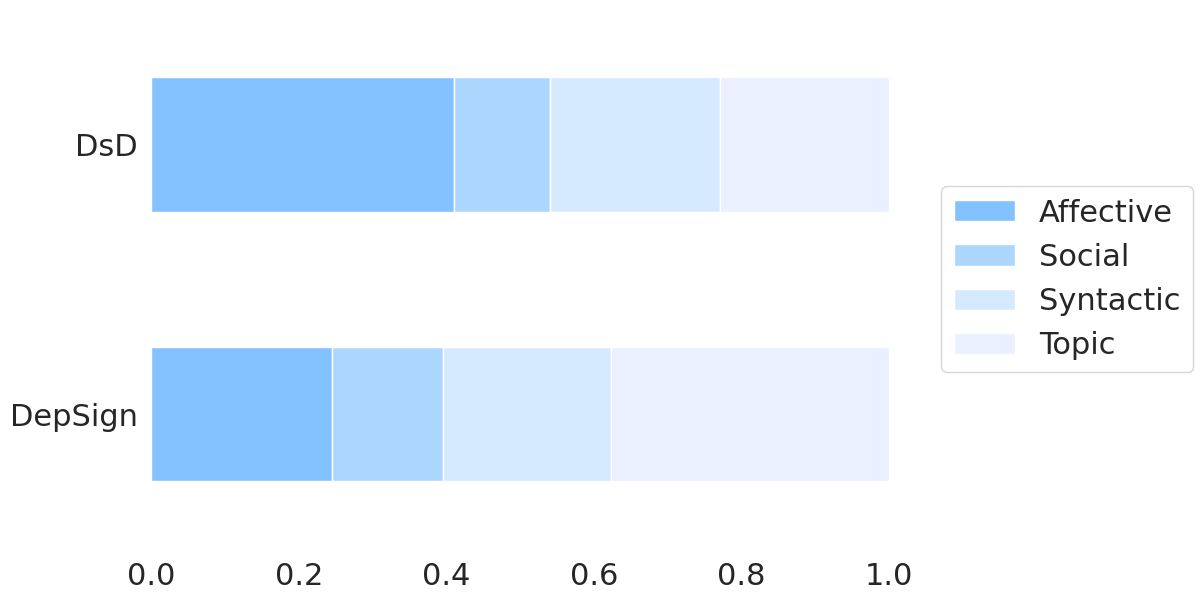

In [46]:
import numpy as np
from ast import literal_eval
# calculate the percentage of features from each category in the selected features and plot a stacked barchart with the results of both datasets

# best_features is a dictionary with the best features for each dataset
# best_features = {'dataset1': ['feature1', 'feature2', ...], 'dataset2': ['feature1', 'feature2', ...]}
categories = {
    'affective' : affective,
    'social' : social,
    'syntactic' : syntactic,
    'topic' : topic
}

# calculate the percentage of features from each category in the selected features
best_features_percentage = {}
for dataset in best_features:
    best_features_percentage[dataset] = {}
    for category in categories:
        best_features_percentage[dataset][category] = 0
        for feature in literal_eval(best_features[dataset]):
            if feature in categories[category]:
                best_features_percentage[dataset][category] += 1
        best_features_percentage[dataset][category] /= len(literal_eval(best_features[dataset]))

# plot a stacked barchart with the results of both datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=2)

custom_palette = ["#84C1FF", "#ADD6FF", "#D6EAFF", "#EAF0FF"]

sns.set_palette(palette=custom_palette)
plt.rcParams["figure.figsize"] = (10, 7)
sns.set_style("whitegrid", {'axes.grid' : False})

df = pd.DataFrame(best_features_percentage)
df.columns = ['DepSign', 'DsD']
df = df.T
df.columns = ['Affective', 'Social', 'Syntactic', 'Topic']
ax = df.plot(kind='barh', stacked=True, )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(bottom = True, left = True)
plt.show()

# save fig as pdf
fig = ax.get_figure()
fig.savefig('best_features_percentage.pdf', bbox_inches='tight')


In [47]:
best_features_percentage

{'depression_ltedi': {'affective': 0.24561403508771928,
  'social': 0.14912280701754385,
  'syntactic': 0.22807017543859648,
  'topic': 0.37719298245614036},
 'depression_severity': {'affective': 0.4098360655737705,
  'social': 0.13114754098360656,
  'syntactic': 0.22950819672131148,
  'topic': 0.22950819672131148}}

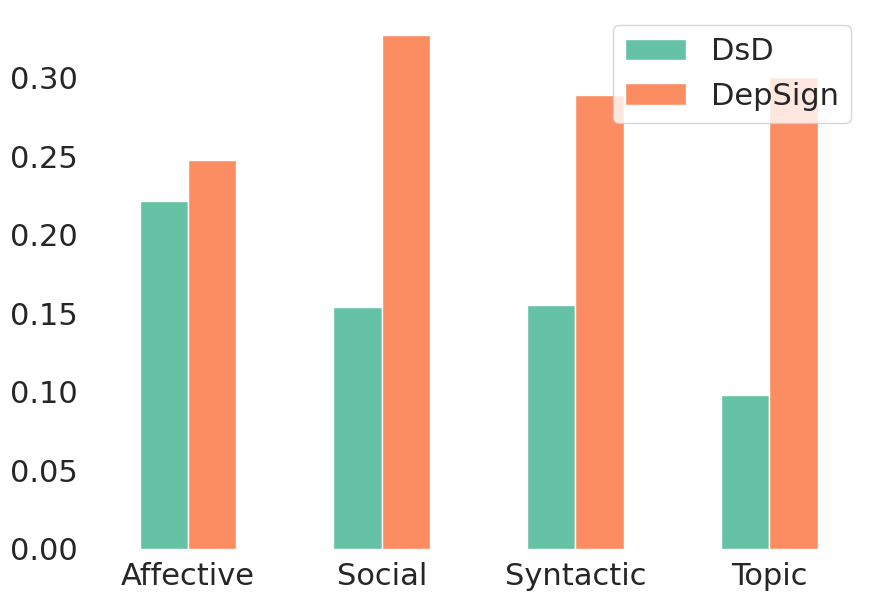

In [48]:



# adapt the above code to plot the percentage of features selected from each category for the two datasets in the same plot
datasets = ['depression_severity', 'depression_ltedi']
# calculate the percentage of features from each category that have been selected and plot a stacked barchart with the results of both datasets

# best_features is a dictionary with the best features for each dataset
# best_features = {'dataset1': ['feature1', 'feature2', ...], 'dataset2': ['feature1', 'feature2', ...]}
categories = {
    'affective' : affective,
    'social' : social,
    'syntactic' : syntactic,
    'topic' : topic
}

# calculate the percentage of features from each category that have been selected
feature_category_percentage = {}

for dataset in datasets:
    feature_category = {}
    for feature in literal_eval(best_features[dataset]):
        category = 'affective' if feature in affective else 'social' if feature in social else 'syntactic' if feature in syntactic else 'topic'
        if category not in feature_category:
            feature_category[category] = 1
        else:
            feature_category[category] += 1
    feature_category_percentage[dataset] = {}
    for category in feature_category:
        feature_category_percentage[dataset][category] = feature_category[category] / len(categories[category])

sns.set(font_scale=2)

sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_style("whitegrid", {'axes.grid' : False})
df = pd.DataFrame(feature_category_percentage)
df.columns = ['DsD', 'DepSign']
df.index = ['Affective', 'Social', 'Syntactic', 'Topic']
# plot a barchart with the results of both datasets
ax = df.plot.bar(figsize=(10, 7))
plt.xticks(rotation=0)
plt.legend(loc='upper right')
sns.despine(bottom = True, left = True)

plt.show()

# save the plot
fig = ax.get_figure()
fig.savefig('feature_category_percentage.pdf', bbox_inches='tight')